# Practicum Data Augmentation

## Imports

In [75]:
# Voeg imports toe als je ze nodig hebt

## Bronnen

EuroSAT project: https://github.com/phelber/eurosat

Pytorch Vision: https://pytorch.org/vision/stable/index.html

## Context

De hoeveelheid data is vaak de beperkende factor in machine learning met convolution neural nets (CNN). In dit practicum vergroten we de EuroSAT dataset kunstmatig, zodat ons CNN meer variatie ziet om van te leren.

## Opdrachten

### Opdracht 1: dataset downloaden

Download de EuroSAT_RGB dataset.

Zie https://zenodo.org/record/7711810#.ZAm3k-zMKEA voor de beschrijving.

In [76]:
# Extra: kun je de dataset ook met python downloaden?

# Hint: gebruik de requests module

### Opdracht 2: dataset inspecteren

Unzip de EuroSAT_RGB.zip in de folder van dit notebook (. path) en bekijk de inhoud.

In [77]:
# Extra: kun je de dataset ook met python unzippen?

# Hint: gebruik de zipfile module

In [78]:
import requests

#test = requests.get('https://zenodo.org/record/7711810/files/EuroSAT_RGB.zip?download=1')
#test.status_code

In [79]:
# with open('EuroSAT_RGB.zip', 'wb') as code:
#     code.write(test.content)

In [80]:
# import zipfile
# with zipfile.ZipFile('EuroSAT_RGB.zip','r') as zip_ref:
#     zip_ref.extractall('data')

### Opdracht 3/4: afbeelding inladen en tonen

PyTorch Vision maakt het inladen van afbeeldingen gemakkelijk via:

https://pytorch.org/vision/stable/io.html

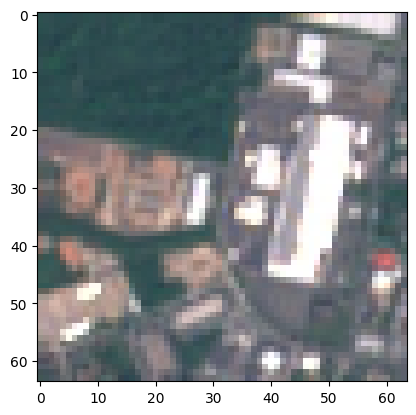

In [81]:
import torchvision
import matplotlib.pyplot as plt

industrial_1 = torchvision.io.read_image('./data/EuroSAT_RGB/Industrial/Industrial_1.jpg')

plt.imshow(industrial_1.permute(1,2,0))

In [82]:
industrial_1.shape

torch.Size([3, 64, 64])

### Opdracht 5: afbeelding bewerken

Ook augmentatie maakt PyTorch Vision makkelijk.

In [83]:
# a. Welke module is bedoeld voor het bewerken van afbeeldingen?

# b. Schaal de afbeelding op naar 2x de originele grootte (variable 'industrial_2x')

# c. Voer een willekeurige rotatie uit op de vergrote afbeelding (variable 'industrial_2x_rot')

# d. Converteer de bewerkte afbeelding naar grijstinten (variable 'industrial_2x_rot_gray')

# e. Sla de bewerkte afbeeldingen op

# f. Toon alle varianten in een grid

torch.Size([3, 128, 128])
<class 'torch.Tensor'>
torch.Size([3, 128, 128])
torch.Size([1, 128, 128])


d:\0_Program_Files\Python3.11\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


<Figure size 640x480 with 0 Axes>

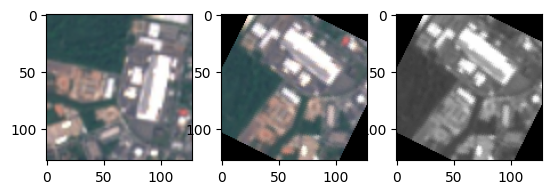

In [84]:
# torchvision.transforms.<method>

mag2x = torchvision.transforms.Resize(128)
industrial_2x = mag2x(industrial_1)
print(industrial_2x.shape)
print(type(industrial_2x))

rotimg = torchvision.transforms.RandomRotation([0,90])
industrial_rot = rotimg(industrial_2x)
print(industrial_rot.shape)

greyimg = torchvision.transforms.Grayscale()  #forgot () for method
industrial_2x_rot_grey = greyimg(industrial_rot)
print(industrial_2x_rot_grey.shape)


torchvision.io.write_png(industrial_2x,'industrial_2x.png')
torchvision.io.write_png(industrial_rot,'industrial_rot.png')
torchvision.io.write_png(industrial_2x_rot_grey,'industrial_rot_grey.png')

# test = industrial_2x.permute(1,2,0).numpy()
# print(type(test))
# print(test.shape)
# plt.imshow(test)

plt.figure()
f, axs = plt.subplots(1,3)

# axs[i] = plt.imshow(image) == pass the axes to the plotting functions, but inside of those you need to actually use those passed axes. 
# Else all the plt commands will apply to the currently active axes, which is the last one you create.
# with axs[0] = plt.imshow(image)  each axs[i] is treated as an individual axis object, and we use the imshow method of each axis to display the respective image

axs[0].imshow(industrial_2x.permute(1,2,0))
axs[1].imshow(industrial_rot.permute(1,2,0))
axs[2].imshow(industrial_2x_rot_grey.permute(1,2,0), cmap='gray', vmin=0, vmax=255) #for greyscale (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
plt.show()

### Reflectie

Zijn alle transformaties zinnig voor deze dataset?

In [85]:
# Extra: Je kunt alle acties ook bundelen, zie: https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose

# a. Probeer nog een aantal transformaties uit en bundel ze als 1 tranformatie

In [86]:
# In order to script the transformations, please use torch.nn.Sequential instead of Compose.
import torch

mycomposition = torch.nn.Sequential(
                        torchvision.transforms.CenterCrop(100),
                        torchvision.transforms.RandomRotation([0,145]),
                        torchvision.transforms.RandomPosterize(2)
                )     

scripted_transforms = torch.jit.script(mycomposition)          

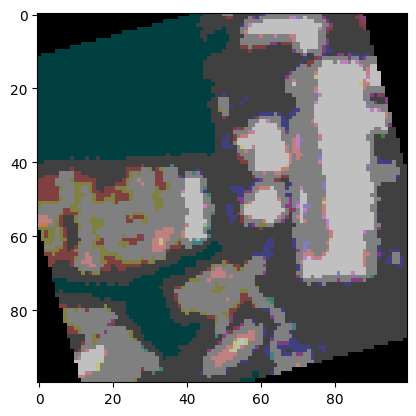

In [87]:
comp_image = scripted_transforms(industrial_2x)
plt.imshow(comp_image.permute(1,2,0))

### Opdracht 6: batch bewerkingen

Tot nu toe hebben we een enkele afbeelding bewerkt.

torch.Size([3, 64, 64])


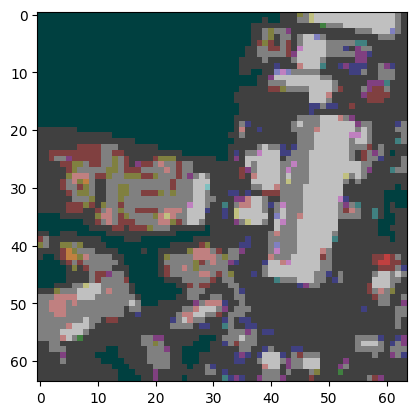

In [88]:
# Generaliseer de bovenstaande stappen en batch-bewerk de Industrial folder

# From the documentation:
# The transformations that accept tensor images also accept batches of tensor images. 
# A batch of Tensor Images is a tensor of (B, C, H, W) shape, where B is a number of images in the batch.

    # The expected range of the values of a tensor image is implicitly defined by the tensor dtype. Tensor images with a float dtype are expected to have values in [0, 1]. 
    # Tensor images with an integer dtype are expected to have values in [0, MAX_DTYPE] where MAX_DTYPE is the largest value that can be represented in that dtype.

def posterize(image):
    posterizefunction = torchvision.transforms.RandomPosterize(2) 
    # If img is torch Tensor, it should be of type torch.uint8, and it is expected to be in […, 1 or 3, H, W] format,
    #  where … means it can have an arbitrary number of leading dimensions. If img is PIL Image, it is expected to be in mode “L” or “RGB”.
    return (posterizefunction(image))

ind = posterize(industrial_1)
print(ind.shape)
plt.imshow(ind.permute(1,2,0))


In [89]:
from torchvision.datasets import ImageFolder 
from torchvision.transforms import ToTensor
dataset_path = "./data/EuroSAT_RGB/"
transform = ToTensor()
dataset = ImageFolder(dataset_path, transform=transform)

In [90]:
dataset.class_to_idx

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [91]:
# build subset
idx = [i for i in range(len(dataset)) if (dataset.imgs[i][1] == dataset.class_to_idx['Industrial']) ]
subset = torch.utils.data.Subset(dataset, idx)

In [92]:
len(subset)

2500

In [93]:
import torchvision.transforms.functional as TF
industrial_dataset_posterized = []
for sample_idx in range(len(subset)):
    
    sample = subset[sample_idx]
    image, label = sample

    #normalize prevent black img when converting to uint8
    norm_img = image / image.max()
    uint8_tensor = (norm_img  * 255).byte()
    post_image = posterize(uint8_tensor)

    industrial_dataset_posterized.append(post_image)

    if sample_idx % 5000 == 0:
        print("Sample:", sample_idx)
        print("Image shape:", image.shape)
        print("Label:", label)
        print(type(image))
        print(image.dtype)
        print(image)

    #industrial_dataset_posterized.append(posterize(sample[0]))
                                         

Sample: 0
Image shape: torch.Size([3, 64, 64])
Label: 4
<class 'torch.Tensor'>
torch.float32
tensor([[[0.1804, 0.1804, 0.1843,  ..., 0.8824, 0.6196, 0.4078],
         [0.1804, 0.1804, 0.1843,  ..., 0.8824, 0.6196, 0.4000],
         [0.1725, 0.1765, 0.1843,  ..., 0.8353, 0.5490, 0.3843],
         ...,
         [0.3333, 0.3373, 0.3725,  ..., 0.3529, 0.3765, 0.3686],
         [0.2588, 0.2627, 0.2824,  ..., 0.3216, 0.3529, 0.3569],
         [0.2588, 0.2627, 0.2980,  ..., 0.3333, 0.3608, 0.3608]],

        [[0.3137, 0.3137, 0.3059,  ..., 0.8627, 0.6118, 0.4039],
         [0.3137, 0.3137, 0.3059,  ..., 0.8627, 0.6118, 0.4078],
         [0.3137, 0.3098, 0.3059,  ..., 0.8157, 0.5490, 0.4000],
         ...,
         [0.3686, 0.3647, 0.3843,  ..., 0.3804, 0.3922, 0.3843],
         [0.3176, 0.3137, 0.3176,  ..., 0.3490, 0.3804, 0.3843],
         [0.3373, 0.3333, 0.3373,  ..., 0.3608, 0.3882, 0.3882]],

        [[0.3098, 0.3098, 0.3176,  ..., 0.8863, 0.6549, 0.4588],
         [0.3098, 0.3176, 0.31

In [94]:
len(industrial_dataset_posterized)

2500

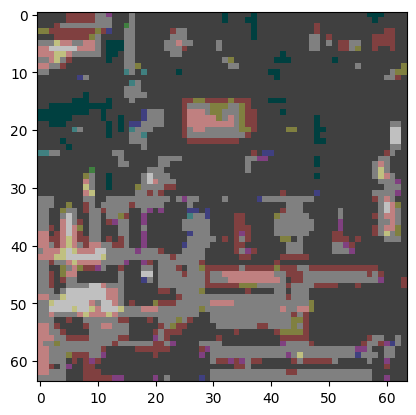

In [95]:
plt.imshow(industrial_dataset_posterized[2000].permute(1,2,0))

<Figure size 500x500 with 0 Axes>

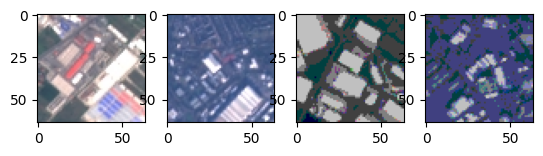

In [122]:
import random
x = 4
plt.figure(figsize=(5,5))
f, axs = plt.subplots(1,x)
for i in range(x):
    q = random.randint(0,2500)
    axs[i].imshow(industrial_dataset_posterized[q].permute(1,2,0))
